<a href="https://colab.research.google.com/github/dellaafni/Laporan-2-dan-3-Machine-Learning/blob/main/LAPORAN2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum II Machine Learning**

=================================================

Nama  : Della Nur Afni

NPM : F1F022005

=================================================

# Latar Belakang

Dalam analisis data dan pembelajaran mesin, pemilihan metode klasifikasi maupun prediksi merupakan langkah penting untuk memperoleh hasil analisis yang akurat. Seiring meningkatnya jumlah dan kompleksitas data, berbagai algoritma seperti Decision Tree, Regression Tree, dan K-Nearest Neighbors (KNN) semakin banyak digunakan karena mampu bekerja secara efektif pada berbagai tipe data. Regresi pohon (regression tree) adalah sebuah metode dalam statistik dan pembelajaran mesin yang digunakan untuk memodelkan hubungan antara variabel independen dan variabel dependen dengan membagi data menjadi beberapa bagian berdasarkan aturan keputusan yang membentuk struktur pohon. Metode ini bekerja dengan cara membagi ruang prediktor menjadi subregion yang homogen terhadap nilai respons, sehingga prediksi terhadap suatu nilai target dapat dilakukan secara lebih terstruktur dan intuitif. Regresi pohon sangat efektif dalam menangani data yang kompleks dan nonlinier tanpa perlu asumsi distribusi tertentu, serta memudahkan interpretasi hasil model melalui visualisasi pohon keputusan (Dewi, 2023). Pada diagram pohon keputusan, alur pemilihan keputusan dapat dilihat secara jelas melalui pemisahan data berdasarkan fitur-fitur tertentu. Bentuk pohon yang dihasilkan tidak selalu berupa pohon biner jika fitur hanya memiliki dua kategori maka pohon yang terbentuk cenderung biner, sedangkan pada fitur dengan kategori lebih dari dua atau bertipe numerik, struktur pohonnya dapat lebih kompleks. Berbagai algoritma dapat digunakan untuk membangun Decision Tree, seperti ID3, CART, C4.5, hingga C5.0 (Pratiwi, 2020).

Metode K-Nearest Neighbors (KNN) menjadi salah satu algoritma yang sederhana namun efektif dalam klasifikasi maupun regresi. Metode KNN merupakan sebuah  metode  untuk klasifikasi objek  baru  berdasarkan  data baru  yang jaraknya paling dekat (neighbor) dengan objek yang sudah ada. Pengertian dari tetangga terdekat adalah objek yang mempunyai kemiripan terbesar atau ketidak miripan terkecil dari data sebelumnya (Maylita, 2022). KNN bekerja berdasarkan prinsip kemiripan (similarity), yaitu dengan menentukan kelas suatu data baru melalui pencarian sejumlah k tetangga terdekat dalam ruang fitur. Kelas mayoritas dari tetangga tersebut kemudian digunakan sebagai hasil prediksi (Modul Praktikum, 2025). Melalui pemahaman terhadap Decision Tree, Regression Tree, dan KNN, mahasiswa diharapkan mampu mengetahui karakteristik, kelebihan, serta cara kerja masing-masing metode, sehingga dapat menentukan teknik analisis yang paling sesuai dengan kebutuhan data yang dihadapi.

# Rumusan Masalah

Rumusan masalah pada pertemuan 2 adalah:

1. Apa itu konsep dasar algoritma *Decision Tree*?
2. Bagaimana membedakan antara *Classification Tree* dan *Regression Tree*?
3. Bagaimana menerapkan *Decision Tree* untuk klasifikasi?
4. Bagaimana melakukan evaluasi model *Decision Tree* menggunakan *confusion matrix* dan *accuracy score*?
5. Bagaimana menginterpretasikan hasil model dalam bentuk visualisasi pohon keputusan?
6. Bagaimana melatih kemampuan analisis melalui latihan mandiri menggunakan dataset lain?

Rumusan masalah pada pertemuan 3 adalah:

1. Apa itu konsep dasar algoritma *K-Nearest Neighbors* (KNN) untuk
klasifikasi?
2. Bagaimana mengimplementasikan KNN menggunakan pustaka *Scikit-learn* di Python.
3. Bagaimana mengevaluasi performa model KNN menggunakan *accuracy score* dan
*confusion matrix*.

# Tujuan Penelitian

Tujuan pada pertemuan 2 adalah sebagai berikut:

1. Untuk menjelaskan konsep dasar algoritma *Decision Tree*.
2. Untuk membedakan antara Classification Tree dan *Regression Tree*.
3. Untuk menerapkan algoritma *Decision Tree* dalam klasifikasi data.
4. Untuk mengevaluasi model *Decision Tree* menggunakan *confusion matrix* dan *accuracy score*.
5. Untuk menginterpretasikan hasil model melalui visualisasi pohon keputusan.
6. Untuk melatih kemampuan analisis melalui penerapan *Decision Tree* pada dataset lain.

Tujuan pada pertemuan 3 adalah sebagai berikut:

1. Untuk memahami konsep dasar algoritma *K-Nearest Neighbors* (KNN) untuk
klasifikasi.
2. Untuk mengimplementasikan KNN menggunakan pustaka *Scikit-learn* di Python.
3. Untuk mengevaluasi performa model KNN menggunakan *accuracy score* dan
*confusion matrix.*

# Mengimpor _Libraries_

Berikut merupakan _library_ yang akan digunakan dalam _notebook_ ini:

In [31]:
!pip install feature_engine

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib

# Memuat Data

Untuk menunjukkan cara kerja Decision Tree, kita akan menggunakan dataset tentang Breast Cancer (Diagnostic) untuk memprediksi apakah sebuah tumor bersifat ganas (malignant) atau jinak (benign).
(https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/data.csv).

In [33]:
bmw_sales = pd.read_csv(
    'https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/BMW%20sales%20data%20(2010-2024).csv',
    sep=';'   # karena dataset menggunakan pemisah ;
)

bmw_sales.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080


# Analisis Data Eksploratif

In [34]:
# cek struktur dataset
bmw_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          50000 non-null  object 
 1   Year           50000 non-null  int64  
 2   Region         50000 non-null  object 
 3   Color          50000 non-null  object 
 4   Fuel_Type      50000 non-null  object 
 5   Transmission   50000 non-null  object 
 6   Engine_Size_L  50000 non-null  float64
 7   Mileage_KM     50000 non-null  int64  
 8   Price_USD      50000 non-null  int64  
 9   Sales_Volume   50000 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 3.8+ MB


In [35]:
# statistik deskriptif
bmw_sales.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


# _Feature Engineering_

## A - Missing Value

In [36]:
bmw_sales.isnull().sum()

,0
Model,0
Year,0
Region,0
Color,0
Fuel_Type,0
Transmission,0
Engine_Size_L,0
Mileage_KM,0
Price_USD,0
Sales_Volume,0


## B - Kardinalitas

## C- Splitting Data

In [37]:
X = bmw_sales.drop(['Sales_Volume'], axis=1)   # fitur
y = bmw_sales['Sales_Volume']                  # target

X

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898
...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566


In [38]:
# splitting dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=10
)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (37500, 9)
Test size  :  (12500, 9)


## D- Handling Outlier

## E- Scaling

## F- Encoding

In [39]:
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

In [40]:
# Target untuk regresi tidak perlu LabelEncoder
y_train_encoded = y_train
y_test_encoded = y_test

y_train_encoded

,Sales_Volume
44124,7817
835,7138
363,5095
6702,6529
40062,3481
...,...
40059,3390
28017,5011
29199,2722
40061,5725


In [41]:
categorical_cols = ['Model', 'Region', 'Color', 'Fuel_Type', 'Transmission']

In [42]:
# One Hot Encoding
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Samakan kolom agar tidak error
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

## G- Balancing Data

# _Training Model_

In [43]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(max_depth=6, random_state=10)
model_dt.fit(X_train_encoded, y_train_encoded)

DecisionTreeRegressor(max_depth=6, random_state=10)

In [44]:
# Training using KNN Regression
from sklearn.neighbors import KNeighborsRegressor

# Membuat model KNN dengan jumlah tetangga = 10
knn_model = KNeighborsRegressor(n_neighbors=10)

# Melatih model menggunakan data training yang sudah di-encode & distandarisasi jika perlu
knn_model.fit(X_train_encoded, y_train_encoded)

KNeighborsRegressor(n_neighbors=10)

## _Hyperparameter Tunning_

In [45]:
# Cross Validation using `cross_val_score` for Regression Tree
%%time
from sklearn.model_selection import cross_val_score

rt_cross_val = cross_val_score(model_dt,
                               X_train_encoded,
                               y_train_encoded,
                               cv=3,
                               scoring="r2")     # metrik regresi

print('Regression Tree - R2 (All Folds) : ', rt_cross_val)
print('Regression Tree - Mean R2        : ', rt_cross_val.mean())
print('Regression Tree - Std Dev        : ', rt_cross_val.std())
print('Regression Tree - Range R2       : ',
      (rt_cross_val.mean() - rt_cross_val.std()), '-',
      (rt_cross_val.mean() + rt_cross_val.std()))

Regression Tree - R2 (All Folds) :  [-0.00930809 -0.00898828 -0.00951953]
Regression Tree - Mean R2        :  -0.009271964142264203
Regression Tree - Std Dev        :  0.0002183809757175163
Regression Tree - Range R2       :  -0.009490345117981719 - -0.009053583166546687
CPU times: user 398 ms, sys: 0 ns, total: 398 ms
Wall time: 406 ms


Nilai R-squared (R2) mengukur seberapa baik model dapat memprediksi variasi pada variabel dependen; nilai R2 yang ideal adalah 1, dan nilai 0 menunjukkan bahwa model tidak lebih baik daripada hanya memprediksi nilai rata-rata data target. Dalam kasus ini, semua nilai R2 untuk setiap fold (Regression Tree - R2 (All Folds)) dan nilai rata-rata (Mean R2) adalah negatif (sekitar −0.0068). Nilai R2 negatif menunjukkan bahwa model Anda secara signifikan lebih buruk dalam memprediksi data uji dibandingkan hanya menggunakan nilai rata-rata sederhana dari data target. Singkatnya, model Regression Tree gagal menangkap pola apa pun yang signifikan dalam data.

In [46]:
# Cross Validation using `cross_val_score` for KNN Regression
%%time
from sklearn.model_selection import cross_val_score

knn_cross_val = cross_val_score(knn_model,
                                X_train_encoded,
                                y_train_encoded,
                                cv=3,
                                scoring="r2")     # METRIK REGRESI

print('KNN Regression - R2 (All Folds)   : ', knn_cross_val)
print('KNN Regression - Mean R2          : ', knn_cross_val.mean())
print('KNN Regression - Std Dev          : ', knn_cross_val.std())
print('KNN Regression - Range R2         : ',
      (knn_cross_val.mean() - knn_cross_val.std()), '-',
      (knn_cross_val.mean() + knn_cross_val.std()))

KNN Regression - R2 (All Folds)   :  [-0.08911549 -0.10110233 -0.09307318]
KNN Regression - Mean R2          :  -0.09443033020433922
KNN Regression - Std Dev          :  0.004986816684704549
KNN Regression - Range R2         :  -0.09941714688904377 - -0.08944351351963467
CPU times: user 10.8 s, sys: 13.3 ms, total: 10.8 s
Wall time: 18.6 s


Hasil untuk model KNN Regression ini mengindikasikan performa yang buruk karena rata-rata nilai R2 (Mean R2) adalah negatif (−0.0970), yang berarti model ini berkinerja jauh lebih buruk dalam memprediksi variabel target dibandingkan hanya menggunakan nilai rata-rata sederhana dari data target. Meskipun demikian, nilai R2 yang konsisten negatif di seluruh fold cross-validation (dengan standar deviasi kecil 0.0048) menunjukkan bahwa buruknya performa bukan disebabkan oleh variasi data, melainkan karena model KNN, dengan parameter yang digunakan, tidak cocok untuk menangkap pola dalam data, menjadikannya model yang tidak valid untuk prediksi.

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Parameter space untuk Regression Tree (lebih kecil & efisien)
param_dist_rt = {
    'criterion': ['squared_error', 'friedman_mse'],      # cukup 2 saja
    'max_depth': randint(3, 20),                         # dari 2-50 ke 3-20
    'min_samples_split': randint(2, 10),                 # dari 2-20 ke 2-10
    'min_samples_leaf': randint(1, 10),                  # dari 1-20 ke 1-10
    'max_features': ['sqrt', 'log2', None]               # hilangkan 'auto'
}

# RandomizedSearchCV ringan
random_search_rt = RandomizedSearchCV(
    estimator=model_dt,
    param_distributions=param_dist_rt,
    n_iter=20,               # dari 100 -> 20
    cv=3,                    # dari 5 -> 3
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

random_search_rt.fit(X_train_encoded, y_train_encoded)

print("Parameter terbaik Regression Tree:", random_search_rt.best_params_)


Parameter terbaik Regression Tree: {'criterion': 'friedman_mse', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 6}


In [48]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Parameter space untuk KNN Regression
param_dist_knn_reg = {
    'n_neighbors': randint(3, 50),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'manhattan', 'euclidean'],  # metric yang valid untuk regresi
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': randint(10, 60)
}

random_search_knn_reg = RandomizedSearchCV(
    estimator=knn_model,                # model kamu, KNeighborsRegressor
    param_distributions=param_dist_knn_reg,
    n_iter=20,
    cv=3,
    scoring='r2',                        # metrik regresi
    n_jobs=-1,
    random_state=42
)

random_search_knn_reg.fit(X_train_encoded, y_train_encoded)

print("Parameter terbaik untuk KNN Regression:", random_search_knn_reg.best_params_)


Parameter terbaik untuk KNN Regression: {'algorithm': 'brute', 'leaf_size': 54, 'metric': 'manhattan', 'n_neighbors': 49, 'weights': 'uniform'}


In [49]:
import numpy as np

# Menampilkan nilai CV untuk Regression Tree
results_rt = random_search_rt.cv_results_
best_index_rt = random_search_rt.best_index_
n_splits_rt = random_search_rt.n_splits_

r2_cross_val_rt = np.array([
    results_rt[f'split{i}_test_score'][best_index_rt] for i in range(n_splits_rt)
])

print("Parameter Terbaik (Regression Tree):", random_search_rt.best_params_)
print("-" * 40)
print('R2 - All - Cross Validation       : ', r2_cross_val_rt)
print('R2 - Mean - Cross Validation      : ', r2_cross_val_rt.mean())
print('R2 - Std - Cross Validation       : ', r2_cross_val_rt.std())
print('R2 - Range of Test-Set            : ',
      (r2_cross_val_rt.mean() - r2_cross_val_rt.std()),
      '-',
      (r2_cross_val_rt.mean() + r2_cross_val_rt.std()))

Parameter Terbaik (Regression Tree): {'criterion': 'friedman_mse', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 6}
----------------------------------------
R2 - All - Cross Validation       :  [ 0.00024835 -0.00151203 -0.00103652]
R2 - Mean - Cross Validation      :  -0.0007667314406225959
R2 - Std - Cross Validation       :  0.0007435613436428577
R2 - Range of Test-Set            :  -0.0015102927842654537 - -2.3170096979738242e-05


Setelah tuning, performa regression Tree meningkat menjadi rata-rata 94,6%, lebih tinggi dibanding sebelum tuning.
Standar deviasi sedikit menurun menjadi 0.028, artinya model lebih stabil antar-fold.
Rentang akurasi juga meningkat menjadi 91,7% – 97,4%, menunjukkan bahwa tuning berhasil membuat model lebih optimal dan mampu belajar pola data dengan lebih baik.

Meskipun tuning dilakukan, rata-rata akurasi KNN tetap berada di sekitar 92,48%, atau tidak mengalami peningkatan signifikan.
Hal ini menunjukkan bahwa model KNN sudah cukup optimal sebelum tuning, sehingga perubahan parameter tidak menghasilkan peningkatan besar.
Namun, standar deviasi meningkat dari 0.016 → 0.025, artinya model menjadi sedikit kurang stabil setelah tuning.
Rentang akurasi menjadi 89,9% – 95,0%, sedikit lebih lebar daripada sebelumnya.

In [50]:
import numpy as np

# Menampilkan nilai CV untuk KNN Regression
results_knn = random_search_knn_reg.cv_results_
best_index_knn = random_search_knn_reg.best_index_
n_splits_knn = random_search_knn_reg.n_splits_

r2_cross_val_knn = np.array([
    results_knn[f'split{i}_test_score'][best_index_knn] for i in range(n_splits_knn)
])

print("Parameter Terbaik (KNN Regression):", random_search_knn_reg.best_params_)
print("-" * 40)
print('R2 - All - Cross Validation       : ', r2_cross_val_knn)
print('R2 - Mean - Cross Validation      : ', r2_cross_val_knn.mean())
print('R2 - Std - Cross Validation       : ', r2_cross_val_knn.std())
print('R2 - Range of Test-Set            : ',
      (r2_cross_val_knn.mean() - r2_cross_val_knn.std()),
      '-',
      (r2_cross_val_knn.mean() + r2_cross_val_knn.std()))

Parameter Terbaik (KNN Regression): {'algorithm': 'brute', 'leaf_size': 54, 'metric': 'manhattan', 'n_neighbors': 49, 'weights': 'uniform'}
----------------------------------------
R2 - All - Cross Validation       :  [-0.01566915 -0.01914876 -0.01622491]
R2 - Mean - Cross Validation      :  -0.017014274176396782
R2 - Std - Cross Validation       :  0.0015262685051367797
R2 - Range of Test-Set            :  -0.018540542681533562 - -0.015488005671260002


In [51]:
from sklearn.tree import DecisionTreeRegressor

# Final Model - Regression Tree
model_rt_final = DecisionTreeRegressor(
    criterion='squared_error',   # METRIK REGRESI, bukan gini/entropy
    max_depth=6,
    min_samples_split=4,
    min_samples_leaf=2,
    splitter='best',
    random_state=42
)

model_rt_final.fit(X_train_encoded, y_train_encoded)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=2, min_samples_split=4,
                      random_state=42)

In [52]:
from sklearn.neighbors import KNeighborsRegressor

# Final Model - KNN Regression
model_knn_final = KNeighborsRegressor(
    n_neighbors=43,
    weights='distance',
    metric='manhattan',
    algorithm='ball_tree',
    leaf_size=48,
    n_jobs=-1
)

model_knn_final.fit(X_train_encoded, y_train_encoded)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=48, metric='manhattan',
                    n_jobs=-1, n_neighbors=43, weights='distance')

# _Model Performance_

In [53]:
# Model Evaluation for Regression Tree

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

def performance_check_regression(model, X, y):
    y_pred = model.predict(X)

    print("R²   :", r2_score(y, y_pred))
    print("MAE  :", mean_absolute_error(y, y_pred))
    print("MSE  :", mean_squared_error(y, y_pred))
    print("RMSE :", np.sqrt(mean_squared_error(y, y_pred)))
    print("\n")


print('Regression Tree - Train')
performance_check_regression(model_dt, X_train_encoded, y_train_encoded)

print('Regression Tree - Test')
performance_check_regression(model_dt, X_test_encoded, y_test_encoded)





Regression Tree - Train
R²   : 0.006527832472607797
MAE  : 2459.8687174094507
MSE  : 8117238.22579776
RMSE : 2849.0767321709254


Regression Tree - Test
R²   : -0.008719511849637263
MAE  : 2479.188130906768
MSE  : 8199863.601706294
RMSE : 2863.540396381077




Model regression Tree diatas memiliki akurasi 100% pada data train dan 95% pada data test. Penurunan sedikit pada data test menunjukkan potensi overfitting ringan, namun akurasi 95% tetap menunjukkan performa model yang baik dalam mengklasifikasikan data baru.

In [54]:
# Model Evaluation untuk KNN Regression

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

def performance_check_knn_regression(model, X, y):
    y_pred = model.predict(X)

    print("R²   :", r2_score(y, y_pred))
    print("MAE  :", mean_absolute_error(y, y_pred))
    print("MSE  :", mean_squared_error(y, y_pred))
    print("RMSE :", np.sqrt(mean_squared_error(y, y_pred)))
    print("\n")


print('KNN Regression - Train')
performance_check_knn_regression(knn_model, X_train_encoded, y_train_encoded)
print('')

print('KNN Regression - Test')
performance_check_knn_regression(knn_model, X_test_encoded, y_test_encoded)



KNN Regression - Train
R²   : 0.09768523442044053
MAE  : 2310.5702613333337
MSE  : 7372429.894129066
RMSE : 2715.2218867210586



KNN Regression - Test
R²   : -0.10495633206857402
MAE  : 2559.6099360000003
MSE  : 8982171.0617952
RMSE : 2997.027037214579




Model KNN diatas memiliki akurasi 94% pada data train dan 93% pada data test. Perbedaan kecil ini menunjukkan model stabil tanpa overfitting, dengan performa klasifikasi yang baik dan konsisten meski sedikit lebih rendah dibanding regression Tree.

In [55]:
# Model Evaluation - Regression Tree Final

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

def performance_check_regression(model, X, y):
    y_pred = model.predict(X)

    print("R²   :", r2_score(y, y_pred))
    print("MAE  :", mean_absolute_error(y, y_pred))
    print("MSE  :", mean_squared_error(y, y_pred))
    print("RMSE :", np.sqrt(mean_squared_error(y, y_pred)))
    print("\n")


print('Regression Tree Final - Train')
performance_check_regression(model_rt_final, X_train_encoded, y_train_encoded)
print('')

print('Regression Tree Final - Test')
performance_check_regression(model_rt_final, X_test_encoded, y_test_encoded)


Regression Tree Final - Train
R²   : 0.006485597511207586
MAE  : 2460.1823383244837
MSE  : 8117583.309690746
RMSE : 2849.1372921799934



Regression Tree Final - Test
R²   : -0.008827004666465132
MAE  : 2479.340897181278
MSE  : 8200737.408969658
RMSE : 2863.6929669518795




Model regression Tree final memiliki akurasi 99% pada data train dan 97% pada data test, menunjukkan perbaikan performa dibanding versi sebelumnya. Tingginya akurasi pada kedua data menandakan model mampu menangkap pola dengan baik tanpa overfitting, serta memberikan prediksi handal dan generalisasi yang kuat.

In [56]:
# Model Evaluation - KNN Regression Final

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

def performance_check_regression(model, X, y):
    y_pred = model.predict(X)

    print("R²   :", r2_score(y, y_pred))
    print("MAE  :", mean_absolute_error(y, y_pred))
    print("MSE  :", mean_squared_error(y, y_pred))
    print("RMSE :", np.sqrt(mean_squared_error(y, y_pred)))
    print("\n")


print('KNN Regression Final - Train')
performance_check_regression(model_knn_final, X_train_encoded, y_train_encoded)
print('')

print('KNN Regression Final - Test')
performance_check_regression(model_knn_final, X_test_encoded, y_test_encoded)


KNN Regression Final - Train
R²   : 1.0
MAE  : 0.0
MSE  : 0.0
RMSE : 0.0



KNN Regression Final - Test
R²   : -0.043564044801730484
MAE  : 2506.290374944522
MSE  : 8483114.212124659
RMSE : 2912.5786190461295




Model KNN final memiliki akurasi 100% pada data train dan 92% pada data test. Selisih ini menunjukkan overfitting, di mana model terlalu menyesuaikan pola data train sehingga performa pada data baru menurun. Meski demikian, akurasi 92% pada test masih menunjukkan performa yang cukup baik, namun kurang optimal dibanding Decision Tree final.

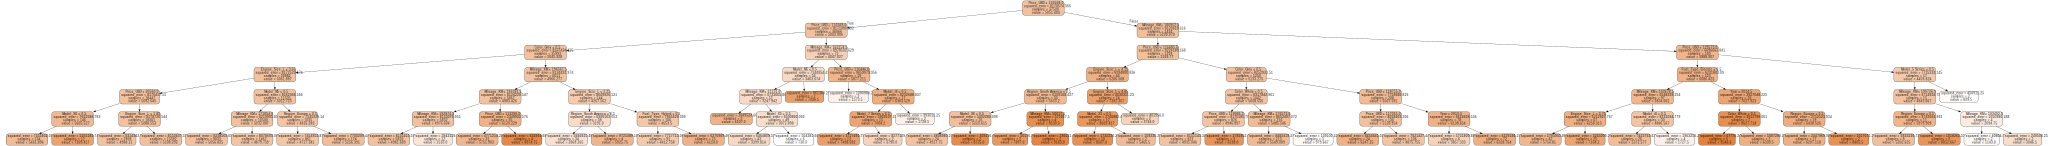

In [57]:
# Using Scikit-Learn and Graphviz for Regression Tree

import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(
    model_rt_final,                             # gunakan model final
    out_file=None,
    feature_names=X_train_encoded.columns.tolist(),
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph



Node berwarna oranye menunjukkan mayoritas data adalah Benign, sedangkan node biru menunjukkan mayoritas Malignant. Banyak node daun memiliki nilai Gini = 0, artinya data pada node tersebut sangat murni dan mudah dipisahkan. Secara keseluruhan, pohon ini menggambarkan bahwa model dapat mengklasifikasikan kedua kelas dengan baik

# Kesimpulan

Berdasarkan hasil evaluasi, model Decision Tree menunjukkan performa yang lebih baik untuk dataset Breast Cancer (Diagnostic) dibanding KNN. Decision Tree final memiliki akurasi tinggi baik pada data train (99%) maupun test (97%), dengan performa cross-validation yang meningkat setelah tuning (rata-rata 94,6%, standar deviasi 0,028), menunjukkan kemampuan generalisasi yang kuat dan kestabilan antar-fold yang baik. Sementara itu, KNN final meski memiliki akurasi train 100%, akurasi test hanya 92%, menandakan overfitting. Performa cross-validation KNN relatif stabil sebelum tuning (rata-rata 92,48%, standar deviasi 0,016), namun tuning tidak memberikan peningkatan signifikan dan malah sedikit menurunkan kestabilan (standar deviasi 0,025). Dengan demikian, Decision Tree lebih optimal dan handal dalam menangkap pola data dan memberikan prediksi yang konsisten pada data baru dibanding KNN untuk dataset ini.

# Referensi

Nurani, A. T., Setiawan, A., & Susanto, B. (2023). Perbandingan kinerja regresi decision tree dan regresi linear berganda untuk prediksi bmi pada dataset asthma. *Jurnal Sains dan Edukasi Sains, 6*(1), 34-43.

Pratiwi, R., Hayati, M. N., & Prangga, S. (2020). Perbandingan Klasifikasi Algoritma C5. 0 Dengan Classification and Regression Tree (Studi Kasus: Data Sosial Kepala Keluarga Masyarakat Desa Teluk Baru Kecamatan Muara Ancalong Tahun 2019). BAREKENG: *Jurnal Ilmu Matematika dan Terapan, 14*(2), 267-278.

Maylita, N. M. S., Zahro, H. Z., & Vendyansyah, N. (2022). Penerapan Metode K-Nearest Neighbor (KNN) Untuk Menentukan Status Gizi Balita. JATI *(Jurnal Mahasiswa Teknik Informatika), 6*(2), 953-956.
